In [2]:
#import the necessary packages
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

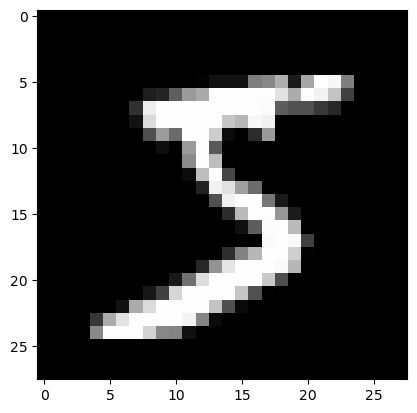

In [10]:
#load the training and testing data (MNIST)
(x_train, y_train), (x_test, y_test) = mnist.load_data() 
input_shape = (28, 28)  
num_classes = 10 

x_train = x_train.astype('float32') / 255.0  
x_test = x_test.astype('float32') / 255.0  

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

plt.imshow(x_train[0],cmap='gray')

In [12]:
#define the network architecture using Keras
model = Sequential([
    Flatten(input_shape=input_shape),        
    Dense(128, activation='relu'),            
    Dense(num_classes, activation='softmax')  
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#train the model using SGD
model.compile(optimizer=SGD(learning_rate=0.01),  
              loss='categorical_crossentropy',    
              metrics=['accuracy'])              

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7162 - loss: 1.0626 - val_accuracy: 0.9044 - val_loss: 0.3520
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9027 - loss: 0.3515 - val_accuracy: 0.9194 - val_loss: 0.2873
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9192 - loss: 0.2912 - val_accuracy: 0.9276 - val_loss: 0.2575
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9265 - loss: 0.2636 - val_accuracy: 0.9337 - val_loss: 0.2362
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9343 - loss: 0.2346 - val_accuracy: 0.9379 - val_loss: 0.2158
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9387 - loss: 0.2200 - val_accuracy: 0.9415 - val_loss: 0.2025
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9425 - loss: 0.2020 - val_accuracy: 0.9441 - val_loss: 0.1897
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9482 - loss: 0.1852 -

In [15]:
#evaluate the network
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 - 1s - 2ms/step - accuracy: 0.9532 - loss: 0.1610
Test Loss: 0.1610131561756134
Test Accuracy: 0.9531999826431274


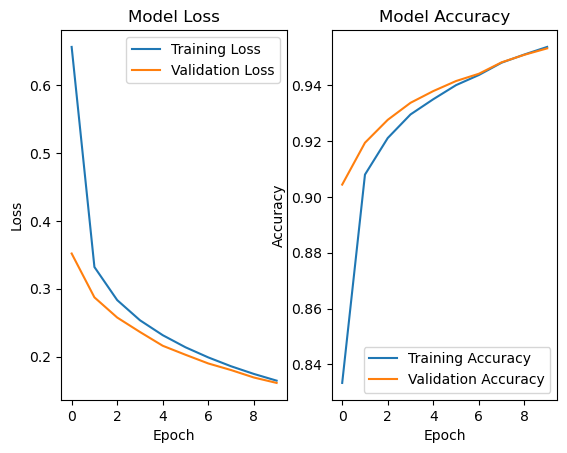

In [14]:
#plot the training loss and accuracy
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()